# 기계학습 11주차 실습 자료
#### 조교 : 김도경

지난주 내용 

1. sklean이란?
    - Scikit-learn 
    - 머신러닝에 사용되는 지도/비지도 학습 알고리즘을 제공하는 파이썬 라이브러리

2. OR 데이터 인식

    OR 데이터에 퍼셉트론 적용
    - from sklearn.linear_model import Perceptron

3. 필기 숫자 데이터 인식

    3-1. sklearn이 제공하는 숫자 데이터에 퍼셉트론 
    - from sklearn.linear_model import Perceptron
    - accuracy : 93.74%
    
- 퍼셉트론의 한계
    - 은닉층을 추가한 다층 퍼셉트론으로 비선형 확장이 필요하다 
- 다층 퍼셉트론의 구조

    3-2. sklearn이 제공하는 숫자 데이터에 다층 퍼셉트론 적용
    - from sklearn.neural_network import MLPClassifier
    - accuracy : 96.24%

- 하이퍼 매개변수란 ?

    모델의 구조와 모델의 학습 과정을 제어하는 역할

4. MNIST 데이터셋으로 확장하기
    - MNIST 필기 숫자 데이터셋
    - 훈련 집합 60000자 + 테스트 집합 10000자
    - 샘플은 28*28 맵으로 표현
    
    - from sklearn.neural_network import MLPClassifier
    - accuracy : 97.77%

-  하이퍼 매개변수 설정 가이드라인

    - 논문이나 공식 문서를 참고  
    - 라이브러리 함수가 제공하는 기본값 사용
    - 중요한 하이퍼 매개변수를 골라 최적화

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
mnist = fetch_openml('mnist_784')
mnist.data = mnist.data/255.0 # [0,255] 범위를 [0,1] 범위로 변환
x_train = mnist.data[:60000]
x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000])
y_test = np.int16(mnist.target[60000:])

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


[3 2 6 1 7 8 5 0 9 1]


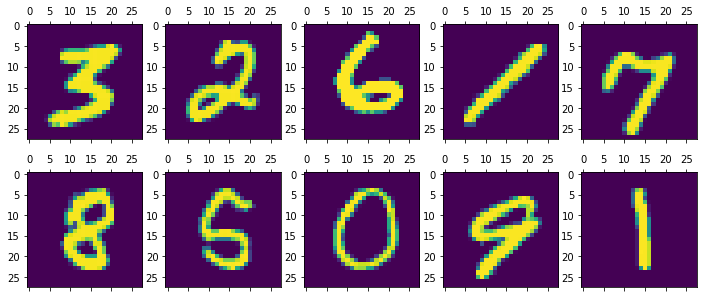

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# 랜덤하게 몇 가지 data 가져오기
random_pick = np.random.randint(low=0, high=10000, size=10)
random_pick
# array([3898, 6815, 6640, 2924,  451, 2688,  633, 6563, 5993, 4024])


figure = plt.figure()
figure.set_size_inches(12, 5)

axes = []
for i in range(1, 11):
    axes.append(figure.add_subplot(2, 5, i))

tmp_list = []
for i in range(10):
    tmp = mnist.data[60000 + random_pick[i]]
    tmp = tmp.reshape(-1, 28)
    tmp_list.append(tmp)
    
print(y_test[random_pick])

for i in range(10):
    axes[i].matshow(tmp_list[i])

In [ ]:

# MLP 분류기 모델을 학습
mlp = MLPClassifier(hidden_layer_sizes = (100), learning_rate_init = 0.001, batch_size = 512, max_iter = 300, solver = 'adam', verbose = True)
mlp.fit(x_train, y_train) # digit 데이터로 모델링 (모델 학습)

# 테스트 집합으로 예측
res = mlp.predict(x_test)  

# 혼동 행렬 
conf = np.zeros((10,10))

for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

# 정확률 계산
no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print('\n테스트 집합에 대한 정확률은 ', accuracy*100,"%입니다.")

Iteration 1, loss = 0.61333281
Iteration 2, loss = 0.26001243
Iteration 3, loss = 0.20418999
Iteration 4, loss = 0.17009150
Iteration 5, loss = 0.14638391
Iteration 6, loss = 0.12873058
Iteration 7, loss = 0.11479032
Iteration 8, loss = 0.10232744
Iteration 9, loss = 0.09203160
Iteration 10, loss = 0.08428087
Iteration 11, loss = 0.07635587
Iteration 12, loss = 0.07091434
Iteration 13, loss = 0.06468958
Iteration 14, loss = 0.06059511
Iteration 15, loss = 0.05487767
Iteration 16, loss = 0.05119480
Iteration 17, loss = 0.04720889
Iteration 18, loss = 0.04507401
Iteration 19, loss = 0.04098583
Iteration 20, loss = 0.03899074
Iteration 21, loss = 0.03586293
Iteration 22, loss = 0.03324938
Iteration 23, loss = 0.03100882
Iteration 24, loss = 0.02889978
Iteration 25, loss = 0.02673655
Iteration 26, loss = 0.02489685
Iteration 27, loss = 0.02328528
Iteration 28, loss = 0.02124257
Iteration 29, loss = 0.02041403
Iteration 30, loss = 0.01889248
Iteration 31, loss = 0.01734721
Iteration 32, los

##1. 단일 하이퍼 파라메터 최적화 : validation_curve 함수 이용

- validation_curve 함수로 최적의 은닉 노드 개수 찾기
- 병렬 처리를 이용해 학습 시간 단축하기

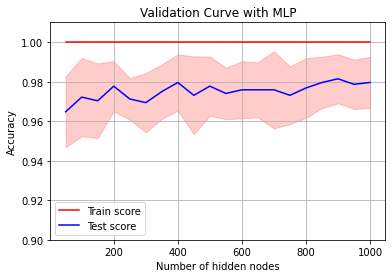

In [2]:
from sklearn import datasets 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
import matplotlib.pyplot as plt
import numpy as np
import time

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size = 0.6)# 훈련,테스트를 6:4로 분할

# 다층 퍼셉트론을 교차 검증으로 성능평가 (소요 시간 측정 포함)
start = time.time() # 시작 시각
mlp = MLPClassifier(learning_rate_init=0.001, batch_size=32, max_iter=300,solver='sgd')
prange = range(50,1001,50)# 50에서 시작하여 50씩 증가시키면서 1000까지 조사
# 코어 4개를 사용하여 병렬 처리 , 10겹 교차 검증으로 성능 측정
train_score,test_score = validation_curve(mlp,x_train,y_train,param_name="hidden_layer_sizes",param_range=prange,cv=10,scoring='accuracy',n_jobs=4)
end = time.time() #끝난 시각 


# 교차 검증 결과의 평균과 분산 구하기 
train_mean = np.mean(train_score,axis = 1)
train_std = np.std(train_score, axis = 1)
test_mean = np.mean(test_score,axis = 1)
test_std = np.std(test_score, axis = 1)

# 성능 그래프 그리기 
plt.plot(prange, train_mean, label = 'Train score', color='r')
plt.plot(prange, test_mean, label = 'Test score', color='b')
plt.fill_between(prange, train_mean-train_std, train_mean+train_std,alpha=0.2,color='r')
plt.fill_between(prange, test_mean-test_std, test_mean+test_std,alpha=0.2,color='r')
plt.legend(loc='best')
plt.title('Validation Curve with MLP')
plt.xlabel('Number of hidden nodes')
plt.ylabel('Accuracy')
plt.ylim(0.9,1.01)
plt.grid(axis='both')
plt.show()

In [5]:
end - start

724.2898695468903

In [3]:
best_number_nodes = prange[np.argmax(test_mean)]  #최적의 은닉 노드 개수
print('\n최적의 은닉층의 노드 개수는 %d개입니다.\n'% best_number_nodes)

# 최적의 은닉 노드 개수로 모델링 

mlp = MLPClassifier(hidden_layer_sizes = (best_number_nodes), learning_rate_init = 0.001, batch_size = 512, max_iter = 300, solver = 'adam', verbose = True)
mlp.fit(x_train, y_train) # digit 데이터로 모델링 (모델 학습)

# 테스트 집합으로 예측
res = mlp.predict(x_test)  

# 혼동 행렬 
conf = np.zeros((10,10))

for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

# 정확률 계산
no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print('\n테스트 집합에 대한 정확률은 ', accuracy*100,"%입니다.")


최적의 은닉층의 노드 개수는 900개입니다.

Iteration 1, loss = 4.65010450
Iteration 2, loss = 2.09435622
Iteration 3, loss = 0.86955751
Iteration 4, loss = 0.53330853
Iteration 5, loss = 0.38482900
Iteration 6, loss = 0.22967788
Iteration 7, loss = 0.20260748
Iteration 8, loss = 0.16785629
Iteration 9, loss = 0.15347828
Iteration 10, loss = 0.10893468
Iteration 11, loss = 0.07680581
Iteration 12, loss = 0.08281106
Iteration 13, loss = 0.08162733
Iteration 14, loss = 0.06544231
Iteration 15, loss = 0.05982703
Iteration 16, loss = 0.05357637
Iteration 17, loss = 0.04631789
Iteration 18, loss = 0.04186189
Iteration 19, loss = 0.03642762
Iteration 20, loss = 0.03722675
Iteration 21, loss = 0.03550029
Iteration 22, loss = 0.03047436
Iteration 23, loss = 0.02689981
Iteration 24, loss = 0.02556187
Iteration 25, loss = 0.02402029
Iteration 26, loss = 0.02207543
Iteration 27, loss = 0.02090854
Iteration 28, loss = 0.02034799
Iteration 29, loss = 0.01924357
Iteration 30, loss = 0.01808072
Iteration 31, loss = 0

- 병렬 처리를 이용해 학습 시간 단축하기 
    - 데이터가 크거나 하이퍼 파라메터 최적화를 위해 학습을 여러번 수행하는 등 시간이 많이 걸리는 프로그래밍일 경우 병렬처리 기능을 활용해 실행 시간을 줄이는데 신경 써야 된다. 
    - GPU를 장착하지 않아도 멀티 코어 마이크로프로세서를 CPU로 사용하기때문에 쿼드 코어 마이크로프로세서가 장착되어 있다면 4개의 작업을 병렬로 실행할 수 있다. 
    - validation_curve 함수의 마지막 매개변수인 n_jobs=4는 작업 4개를 동시에 병렬로 실행하라는 설정이다. 
    - 코어를 하나로 작업했을 때에 비해 4개를 병렬로 실행함으로써 속도를 두배 정도 높일 수 있다 

        - __직접 해보기!__